In [2]:
import pandas as pd
import numpy as np
import datetime
import time

import torch
from torch import nn

import matplotlib.pyplot as plt

In [3]:
# Read bloomberg data
usd_idr = pd.read_csv('usd_idr_data.csv')

usd_idr

,date,open,high,low,close
0,1991-11-05,1977.0,1977.0,1977.0,1977.0
1,1991-11-06,1977.0,1977.0,1977.0,1977.0
2,1991-11-07,1977.0,1977.0,1977.0,1977.0
3,1991-11-08,1977.0,1977.0,1977.0,1977.0
4,1991-11-11,1977.0,1977.0,1977.0,1977.0
...,...,...,...,...,...
8384,2024-10-29,15737.0,15778.0,15737.0,15760.0
8385,2024-10-30,15747.0,15747.0,15700.0,15700.0
8386,2024-10-31,15700.0,15715.0,15695.0,15697.0
8387,2024-11-01,15718.0,15730.0,15713.0,15720.0


In [4]:
# Read bloomberg data
usdt_idrt = pd.read_csv('usdt_idrt_raw.csv')

usdt_idrt

,opentime,openprice,highprice,lowprice,closeprice,closetime
0,2020-04-17,15603.0,15603.0,3500.0,3800.0,2020-04-17
1,2020-04-17,3900.0,9999.0,3121.0,9999.0,2020-04-17
2,2020-04-17,9999.0,15400.0,3121.0,15300.0,2020-04-17
3,2020-04-17,15300.0,15399.0,3905.0,13662.0,2020-04-17
4,2020-04-17,13662.0,15000.0,3905.0,15000.0,2020-04-17
...,...,...,...,...,...,...
2375391,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375392,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375393,2024-10-23,15691.0,15691.0,15691.0,15691.0,2024-10-23
2375394,2024-10-23,15693.0,15693.0,15693.0,15693.0,2024-10-23


In [5]:
usdt_idrt_daily = usdt_idrt.groupby('opentime').agg(
    openprice=('openprice', 'first'),  # Keep the first open price
    closeprice=('closeprice', 'last'),  # Keep the last close price
    highprice=('highprice', 'max'),     # Get the maximum high price
    lowprice=('lowprice', 'min')        # Get the minimum low price
).reset_index()

usdt_idrt_daily

,opentime,openprice,closeprice,highprice,lowprice
0,2020-04-17,15603.0,15503.0,16000.0,3121.0
1,2020-04-18,15503.0,15367.0,15690.0,15367.0
2,2020-04-19,15367.0,15415.0,15698.0,15367.0
3,2020-04-20,15421.0,15485.0,15899.0,15410.0
4,2020-04-21,15485.0,15911.0,15993.0,15440.0
...,...,...,...,...,...
1646,2024-10-19,15528.0,15501.0,15528.0,15500.0
1647,2024-10-20,15501.0,15481.0,15525.0,15480.0
1648,2024-10-21,15481.0,15573.0,15580.0,15425.0
1649,2024-10-22,15573.0,15602.0,15630.0,15556.0


In [6]:
import pandas as pd

# Sample DataFrames (assuming usdt_idrt_daily and usd_idr are already defined)

# Merge the two DataFrames on 'opentime' and 'date'
joined_table = pd.merge(
    usdt_idrt_daily,
    usd_idr,
    left_on='opentime',  # Column from usdt_idrt_daily
    right_on='date',     # Column from usd_idr
    how='inner'          # Keep only rows with matching dates
)

# Display the joined DataFrame
joined_table

,opentime,openprice,closeprice,highprice,lowprice,date,open,high,low,close
0,2020-04-17,15603.0,15503.0,16000.0,3121.0,2020-04-17,15505.0,15540.0,15438.0,15465.0
1,2020-04-20,15421.0,15485.0,15899.0,15410.0,2020-04-20,15470.0,15507.0,15413.0,15413.0
2,2020-04-21,15485.0,15911.0,15993.0,15440.0,2020-04-21,15507.0,15583.0,15468.0,15468.0
3,2020-04-22,15911.0,15749.0,15921.0,15460.0,2020-04-22,15530.0,15585.0,15450.0,15450.0
4,2020-04-23,15749.0,15720.0,15749.0,15422.0,2020-04-23,15524.0,15598.0,15415.0,15415.0
...,...,...,...,...,...,...,...,...,...,...
1088,2024-10-17,15542.0,15569.0,15570.0,15518.0,2024-10-17,15548.0,15553.0,15490.0,15495.0
1089,2024-10-18,15569.0,15528.0,15570.0,15465.0,2024-10-18,15523.0,15523.0,15447.0,15465.0
1090,2024-10-21,15481.0,15573.0,15580.0,15425.0,2024-10-21,15463.0,15498.0,15431.0,15495.0
1091,2024-10-22,15573.0,15602.0,15630.0,15556.0,2024-10-22,15534.0,15572.0,15534.0,15560.0


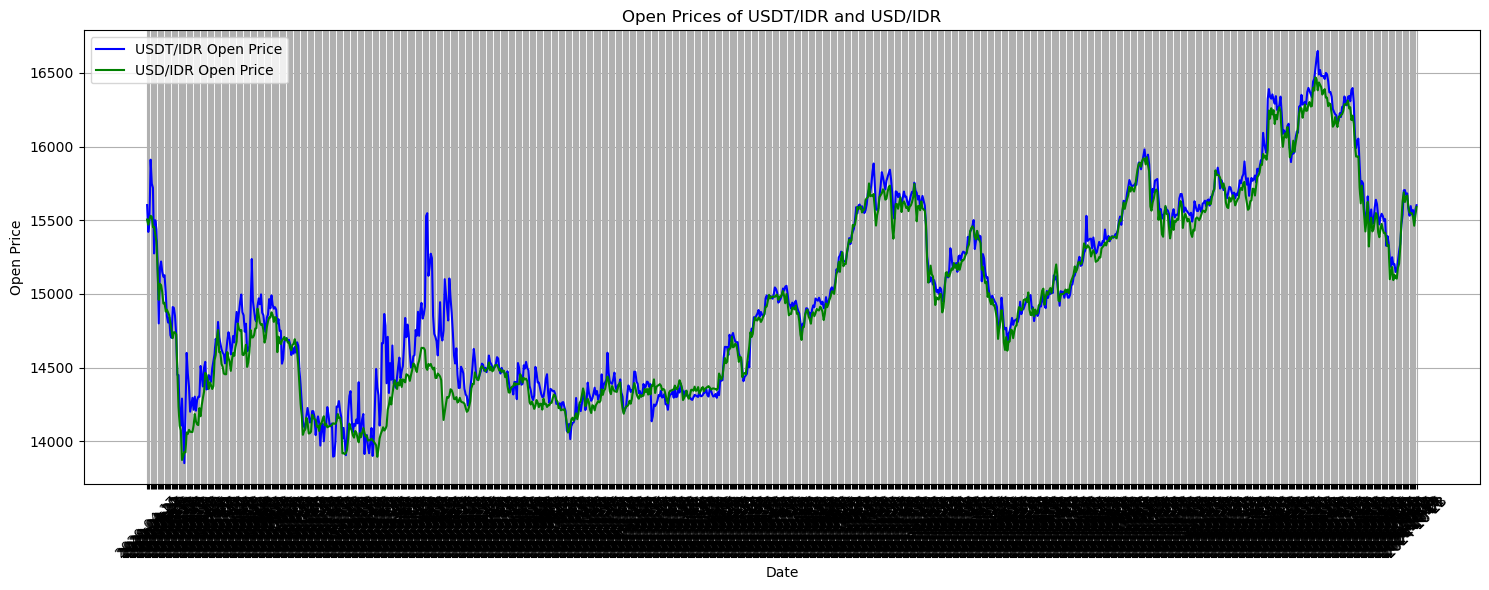

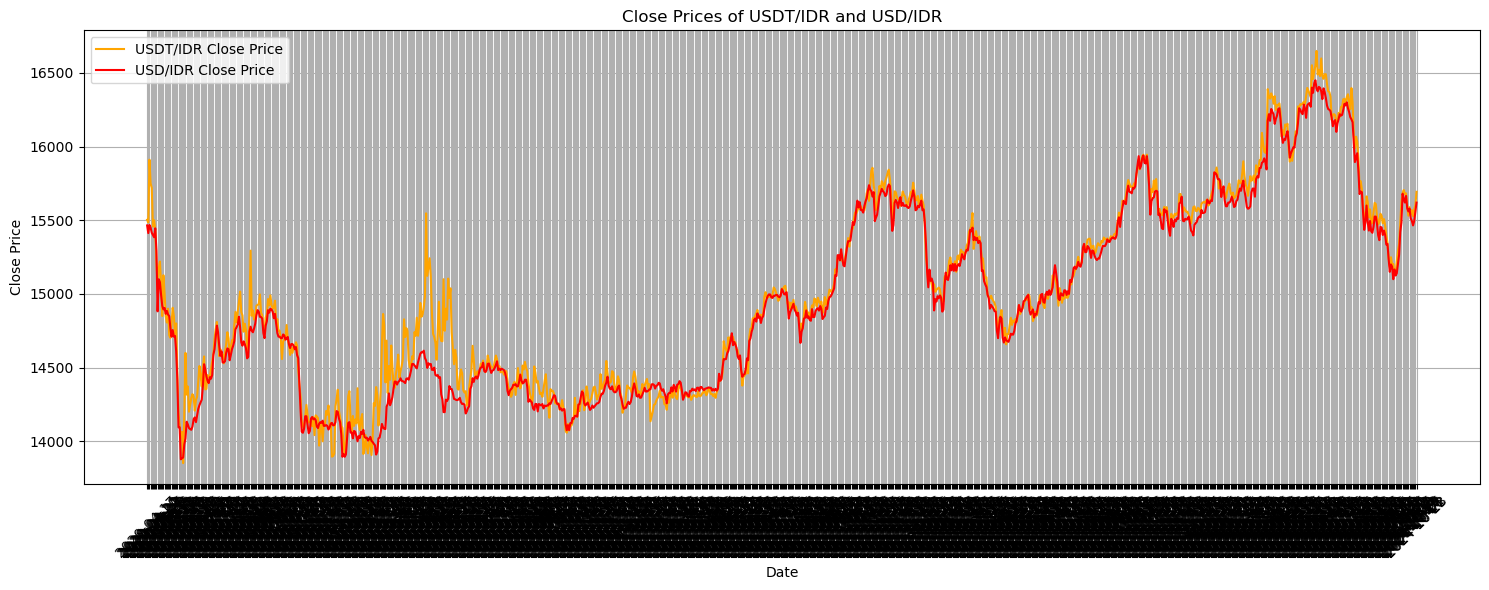

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Convert DataFrame columns to numpy arrays
opentime = np.array(joined_table['opentime'])
openprice = np.array(joined_table['openprice'])
date = np.array(joined_table['date'])
open_usd = np.array(joined_table['open'])

closeprice = np.array(joined_table['closeprice'])
close_usd = np.array(joined_table['close'])

# Set up the first figure for Open Prices
plt.figure(figsize=(15, 6))
plt.plot(opentime, openprice, label='USDT/IDR Open Price', color='blue')
plt.plot(date, open_usd, label='USD/IDR Open Price', color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Prices of USDT/IDR and USD/IDR')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Set up the second figure for Close Prices
plt.figure(figsize=(15, 6))
plt.plot(opentime, closeprice, label='USDT/IDR Close Price', color='orange')
plt.plot(date, close_usd, label='USD/IDR Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of USDT/IDR and USD/IDR')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Yahoo Finance Data

In [8]:
import yfinance as yf

# Set the ticker symbol for USD/IDR
ticker = "USDIDR=X"

# Define the data interval (use '1d' for daily or '1h' for hourly data)
interval = '1d'  # Change to '1h' for hourly data

# Download the historical data
# Define the start and end dates, e.g., for the past year
data = yf.download(ticker, start="2020-01-01", end="2024-11-08", interval=interval)

# Reset index to turn 'date' from index into a column
data_reset = data.reset_index()

# Rename the columns
data_reset.columns = ['date', 'adj_close', 'close', 'high', 'low', 'open', 'volume']

# Select and reorder columns as specified
yahoo_df = data_reset[['date', 'open', 'high', 'low', 'close']]

# Display the updated DataFrame
yahoo_df

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close
0,2020-01-01 00:00:00+00:00,13862.000000,13876.000000,13681.833984,13690.372070
1,2020-01-02 00:00:00+00:00,13847.000000,13906.000000,13688.203125,13689.231445
2,2020-01-03 00:00:00+00:00,13881.299805,13966.000000,13775.500000,13884.786133
3,2020-01-06 00:00:00+00:00,13931.132812,13973.299805,13916.000000,13934.316406
4,2020-01-07 00:00:00+00:00,13929.000000,13939.000000,13875.500000,13926.500000
...,...,...,...,...,...
1262,2024-11-01 00:00:00+00:00,15713.000000,15794.000000,15633.200195,15713.000000
1263,2024-11-04 00:00:00+00:00,15842.000000,15842.000000,15719.000000,15842.000000
1264,2024-11-05 00:00:00+00:00,15790.000000,15791.900391,15707.700195,15790.000000
1265,2024-11-06 00:00:00+00:00,15665.000000,15883.099609,14476.500000,15665.000000


In [9]:
# Convert joined_table['date'] to timezone-aware datetime if needed, or yahoo_df['date'] to non-timezone aware
joined_table['date'] = pd.to_datetime(joined_table['date'])
yahoo_df['date'] = pd.to_datetime(yahoo_df['date']).dt.tz_localize(None)

# Select only 'date', 'open', and 'close' columns from yahoo_df and rename for clarity
yahoo_selected = yahoo_df[['date', 'open', 'close']].rename(columns={'open': 'yahoo_open', 'close': 'yahoo_close'})

# Perform an inner join on the 'date' column
merged_df = joined_table.merge(yahoo_selected, on='date', how='inner')

# Display the merged DataFrame
merged_df

/tmp/ipykernel_2175292/1627986539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yahoo_df['date'] = pd.to_datetime(yahoo_df['date']).dt.tz_localize(None)


,opentime,openprice,closeprice,highprice,lowprice,date,open,high,low,close,yahoo_open,yahoo_close
0,2020-04-17,15603.0,15503.0,16000.0,3121.0,2020-04-17,15505.0,15540.0,15438.0,15465.0,15821.000000,15568.338867
1,2020-04-20,15421.0,15485.0,15899.0,15410.0,2020-04-20,15470.0,15507.0,15413.0,15413.0,15172.589844,15423.000000
2,2020-04-21,15485.0,15911.0,15993.0,15440.0,2020-04-21,15507.0,15583.0,15468.0,15468.0,15712.000000,15377.080078
3,2020-04-22,15911.0,15749.0,15921.0,15460.0,2020-04-22,15530.0,15585.0,15450.0,15450.0,15875.500000,15394.678711
4,2020-04-23,15749.0,15720.0,15749.0,15422.0,2020-04-23,15524.0,15598.0,15415.0,15415.0,15770.500000,15408.622070
...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2024-10-17,15542.0,15569.0,15570.0,15518.0,2024-10-17,15548.0,15553.0,15490.0,15495.0,15583.900391,15583.900391
1089,2024-10-18,15569.0,15528.0,15570.0,15465.0,2024-10-18,15523.0,15523.0,15447.0,15465.0,15493.000000,15493.000000
1090,2024-10-21,15481.0,15573.0,15580.0,15425.0,2024-10-21,15463.0,15498.0,15431.0,15495.0,15467.000000,15467.000000
1091,2024-10-22,15573.0,15602.0,15630.0,15556.0,2024-10-22,15534.0,15572.0,15534.0,15560.0,15556.000000,15556.000000


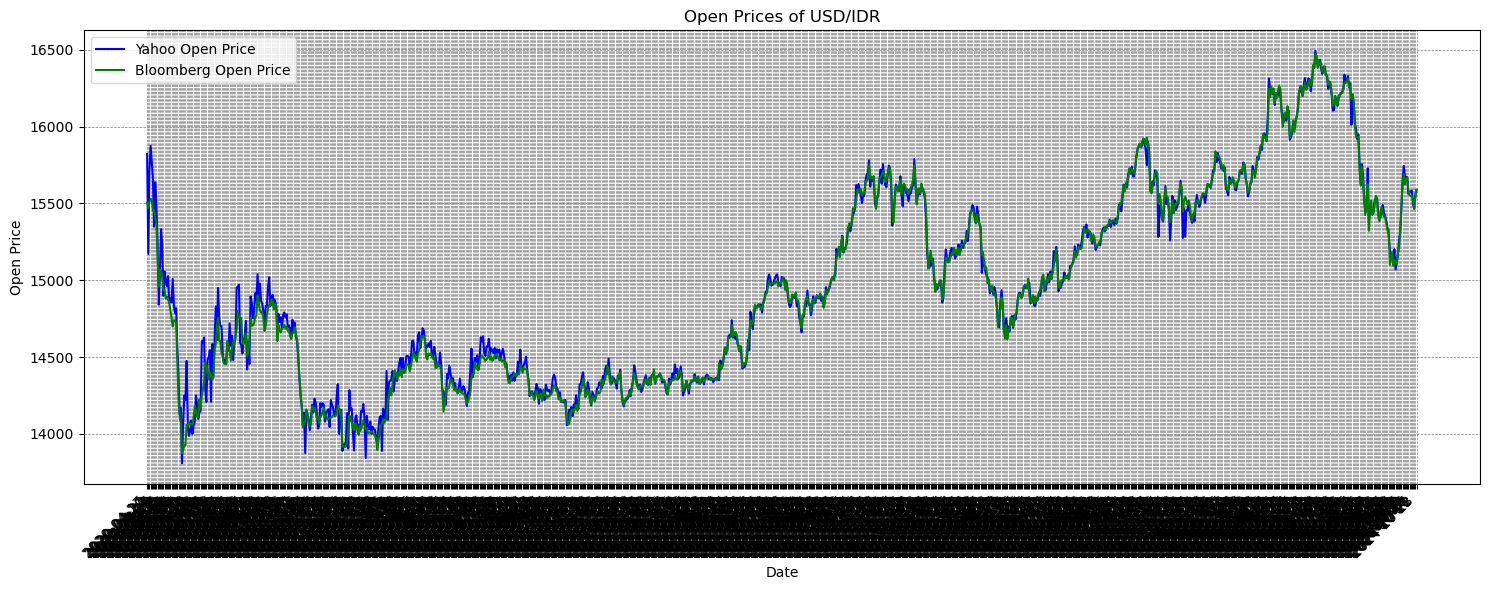

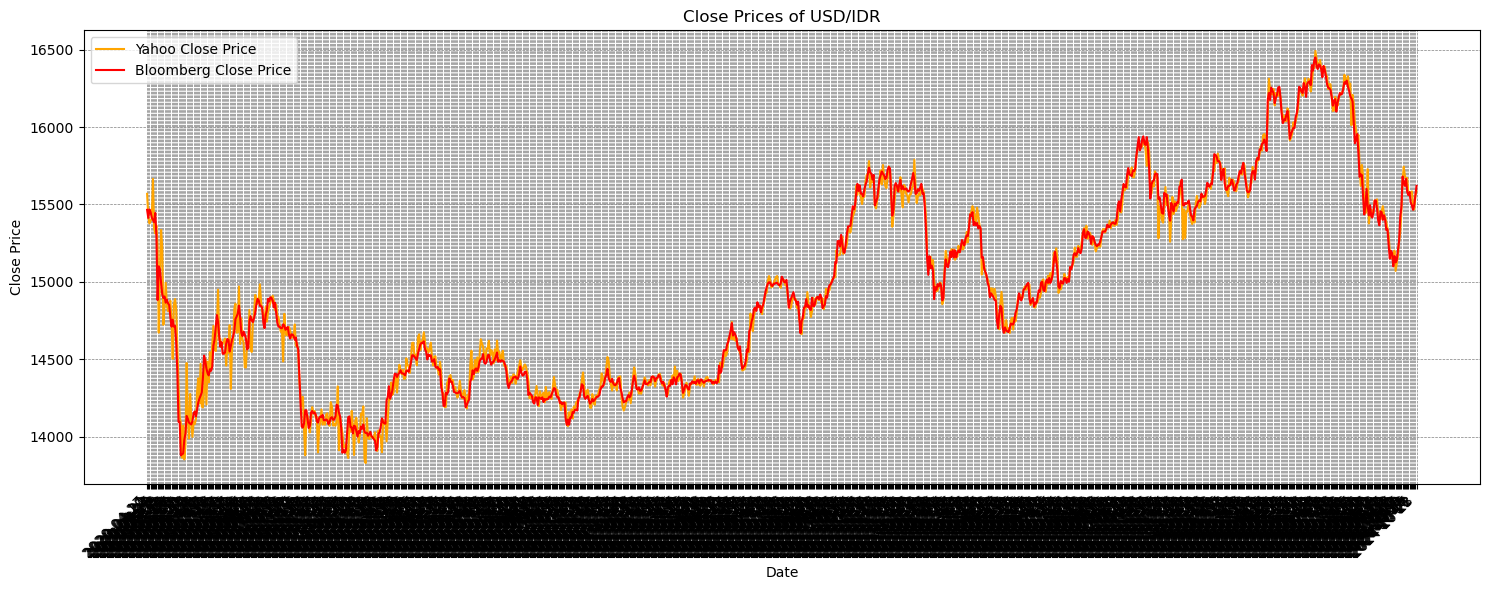

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Convert DataFrame columns to numpy arrays
opentime = np.array(merged_df['opentime'])
openprice = np.array(merged_df['openprice'])
open_usd = np.array(merged_df['open'])
yahoo_open = np.array(merged_df['yahoo_open'])

closeprice = np.array(merged_df['closeprice'])
close_usd = np.array(merged_df['close'])
yahoo_close = np.array(merged_df['yahoo_close'])

# Set up the first figure for Open Prices
plt.figure(figsize=(15, 6))
plt.plot(opentime, yahoo_open, label='Yahoo Open Price', color='blue')
plt.plot(opentime, open_usd, label='Bloomberg Open Price', color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Prices of USD/IDR')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and adjust alignment
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Modify grid style
plt.tight_layout()  # Ensure labels don't get cut off
plt.show()

# Set up the second figure for Close Prices
plt.figure(figsize=(15, 6))
plt.plot(opentime, yahoo_close, label='Yahoo Close Price', color='orange')
plt.plot(opentime, close_usd, label='Bloomberg Close Price', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Prices of USD/IDR')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and adjust alignment
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Modify grid style
plt.tight_layout()  # Ensure labels don't get cut off
plt.show()

In [ ]:
merged_df

,opentime,openprice,closeprice,highprice,lowprice,date,open,high,low,close,yahoo_open,yahoo_close
0,2020-04-17,15603.0,15503.0,16000.0,3121.0,2020-04-17,15505.0,15540.0,15438.0,15465.0,15821.000000,15568.338867
1,2020-04-20,15421.0,15485.0,15899.0,15410.0,2020-04-20,15470.0,15507.0,15413.0,15413.0,15172.589844,15423.000000
2,2020-04-21,15485.0,15911.0,15993.0,15440.0,2020-04-21,15507.0,15583.0,15468.0,15468.0,15712.000000,15377.080078
3,2020-04-22,15911.0,15749.0,15921.0,15460.0,2020-04-22,15530.0,15585.0,15450.0,15450.0,15875.500000,15394.678711
4,2020-04-23,15749.0,15720.0,15749.0,15422.0,2020-04-23,15524.0,15598.0,15415.0,15415.0,15770.500000,15408.622070
...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2024-10-17,15542.0,15569.0,15570.0,15518.0,2024-10-17,15548.0,15553.0,15490.0,15495.0,15583.900391,15583.900391
1089,2024-10-18,15569.0,15528.0,15570.0,15465.0,2024-10-18,15523.0,15523.0,15447.0,15465.0,15493.000000,15493.000000
1090,2024-10-21,15481.0,15573.0,15580.0,15425.0,2024-10-21,15463.0,15498.0,15431.0,15495.0,15467.000000,15467.000000
1091,2024-10-22,15573.0,15602.0,15630.0,15556.0,2024-10-22,15534.0,15572.0,15534.0,15560.0,15556.000000,15556.000000


In [ ]:
error_df = pd.DataFrame()

In [ ]:
error_df['date'] = merged_df['date']

# Calculating yahoo data diff
error_df['open_yahoo_error'] = merged_df['yahoo_open'] - merged_df['open']
error_df['open_yahoo_error_perc'] = error_df['open_yahoo_error'] / merged_df['open'] * 100
error_df['open_yahoo_abs_error_perc'] = abs(error_df['open_yahoo_error_perc'])

error_df['close_yahoo_error'] = merged_df['yahoo_close'] - merged_df['close']
error_df['close_yahoo_error_perc'] = error_df['close_yahoo_error'] / merged_df['close'] * 100
error_df['close_yahoo_abs_error_perc'] = abs(error_df['close_yahoo_error_perc'])

error_df

,date,open_yahoo_error,open_yahoo_error_perc,open_yahoo_abs_error_perc,close_yahoo_error,close_yahoo_error_perc,close_yahoo_abs_error_perc
0,2020-04-17,316.000000,2.038052,2.038052,103.338867,0.668211,0.668211
1,2020-04-20,-297.410156,-1.922496,1.922496,10.000000,0.064880,0.064880
2,2020-04-21,205.000000,1.321984,1.321984,-90.919922,-0.587794,0.587794
3,2020-04-22,345.500000,2.224726,2.224726,-55.321289,-0.358067,0.358067
4,2020-04-23,246.500000,1.587864,1.587864,-6.377930,-0.041375,0.041375
...,...,...,...,...,...,...,...
1088,2024-10-17,35.900391,0.230900,0.230900,88.900391,0.573736,0.573736
1089,2024-10-18,-30.000000,-0.193262,0.193262,28.000000,0.181054,0.181054
1090,2024-10-21,4.000000,0.025868,0.025868,-28.000000,-0.180703,0.180703
1091,2024-10-22,22.000000,0.141625,0.141625,-4.000000,-0.025707,0.025707


In [ ]:
# Select columns except 'date' for calculations
error_df_stats = error_df.drop(columns=['date']).agg(['max', 'min', 'mean'])

# Display the results
error_df_stats

,open_yahoo_error,open_yahoo_error_perc,open_yahoo_abs_error_perc,close_yahoo_error,close_yahoo_error_perc,close_yahoo_abs_error_perc
max,415.000000,2.951636,2.951636,352.636719,2.419868,2.841060
min,-297.410156,-1.922496,0.000000,-429.000000,-2.841060,0.000000
mean,14.001674,0.097544,0.273316,1.745794,0.013108,0.307445
